In [1]:
import mujoco
import mediapy as media
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = mujoco.MjModel.from_xml_path("../robots/wam7_test_v10.xml")
data = mujoco.MjData(model)


""

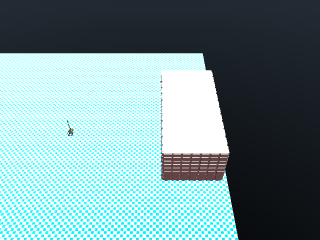

In [3]:
renderer = mujoco.Renderer(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())


In [4]:
duration = 3.8  # (seconds)
framerate = 60  # (Hz)

# Simulate and display video.
points = []
vels = []
mujoco.mj_resetData(model, data)  # Reset state and time.
while data.time < duration:
  mujoco.mj_step(model, data)
  points.append(data.qpos[:3].copy())
  vels.append(data.qvel[:3].copy())
# media.show_video(frames, fps=framerate)
points = np.array(points)
vels = np.array(vels)

In [5]:
from trajectory_estimator import Trajectory
filter = Trajectory()

In [6]:
p_est = np.zeros((points.shape[0],6))

p_est[0] = np.concatenate((points[0],vels[0]))
for i in range(1,p_est.shape[0]):
    p_init = p_est[i-1]
    filter.initialize(p_init)
    p_check,P_check = filter.predict(0.02)
    p_i,P_i = filter.correct(points[i],p_check,P_check)
    p_est[i,:] = p_i
    

In [ ]:
points

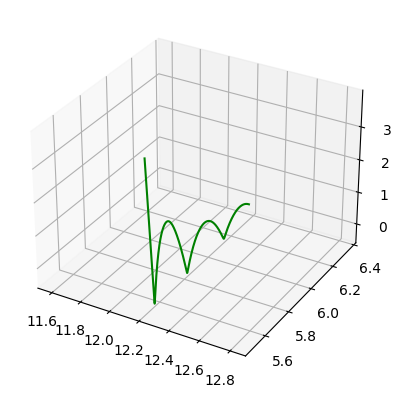

In [11]:
ax = plt.axes(projection ='3d')
ax.plot3D(points[:,0], points[:,1], points[:,2], 'green')
# ax.plot3D(p_est[:5,0], p_est[:5,1], p_est[:5,2], 'red')

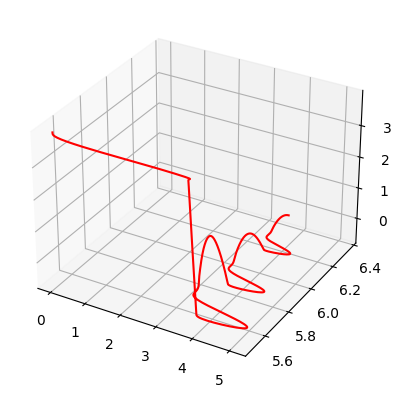

In [12]:
ax2 = plt.axes(projection ='3d')
ax2.plot3D(p_est[:,0], p_est[:,1], p_est[:,2], 'red')